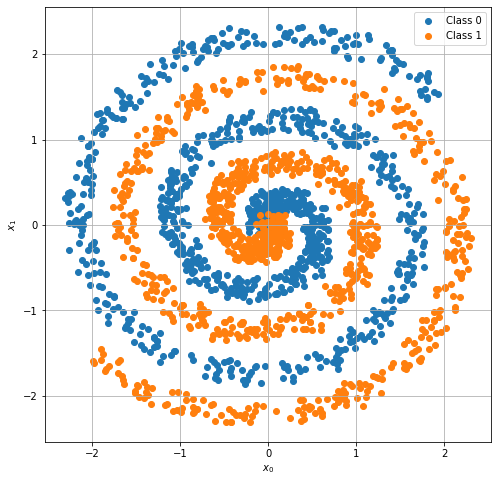

0.6100000000000001


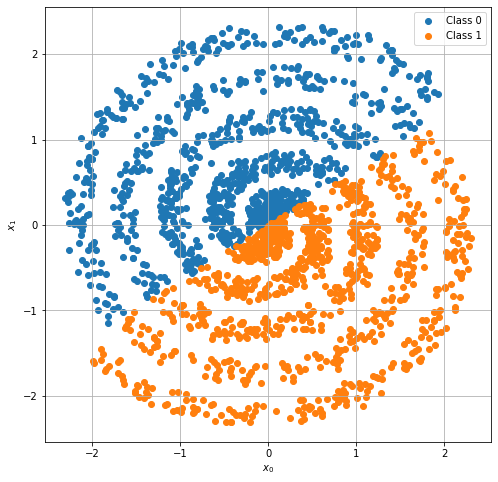

Epoch 1/100
50/50 [==============================] - 1s 20ms/step - loss: 0.6796 - accuracy: 0.5838 - val_loss: 0.6665 - val_accuracy: 0.5975
Epoch 2/100
50/50 [==============================] - 0s 5ms/step - loss: 0.6647 - accuracy: 0.6131 - val_loss: 0.6604 - val_accuracy: 0.6100
Epoch 3/100
50/50 [==============================] - 0s 8ms/step - loss: 0.6619 - accuracy: 0.6162 - val_loss: 0.6596 - val_accuracy: 0.6000
Epoch 4/100
50/50 [==============================] - 0s 6ms/step - loss: 0.6588 - accuracy: 0.6162 - val_loss: 0.6570 - val_accuracy: 0.6125
Epoch 5/100
50/50 [==============================] - 0s 6ms/step - loss: 0.6560 - accuracy: 0.6144 - val_loss: 0.6550 - val_accuracy: 0.6225
Epoch 6/100
50/50 [==============================] - 0s 5ms/step - loss: 0.6525 - accuracy: 0.6388 - val_loss: 0.6529 - val_accuracy: 0.6350
Epoch 7/100
50/50 [==============================] - 0s 5ms/step - loss: 0.6490 - accuracy: 0.6463 - val_loss: 0.6500 - val_accuracy: 0.6425
Epoch 8/100


Epoch 57/100
50/50 [==============================] - 0s 3ms/step - loss: 0.1817 - accuracy: 0.9525 - val_loss: 0.1877 - val_accuracy: 0.9500
Epoch 58/100
50/50 [==============================] - 0s 3ms/step - loss: 0.1687 - accuracy: 0.9563 - val_loss: 0.1798 - val_accuracy: 0.9600
Epoch 59/100
50/50 [==============================] - 0s 3ms/step - loss: 0.1569 - accuracy: 0.9613 - val_loss: 0.1687 - val_accuracy: 0.9500
Epoch 60/100
50/50 [==============================] - 0s 3ms/step - loss: 0.1451 - accuracy: 0.9694 - val_loss: 0.1626 - val_accuracy: 0.9575
Epoch 61/100
50/50 [==============================] - 0s 3ms/step - loss: 0.1386 - accuracy: 0.9688 - val_loss: 0.1582 - val_accuracy: 0.9625
Epoch 62/100
50/50 [==============================] - 0s 3ms/step - loss: 0.1302 - accuracy: 0.9663 - val_loss: 0.1504 - val_accuracy: 0.9675
Epoch 63/100
50/50 [==============================] - 0s 3ms/step - loss: 0.1239 - accuracy: 0.9750 - val_loss: 0.1467 - val_accuracy: 0.9550
Epoch 

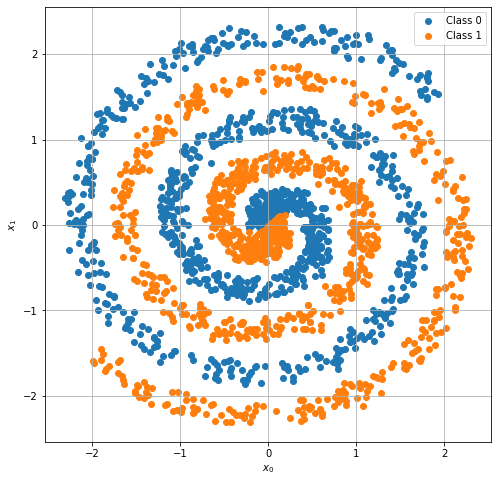

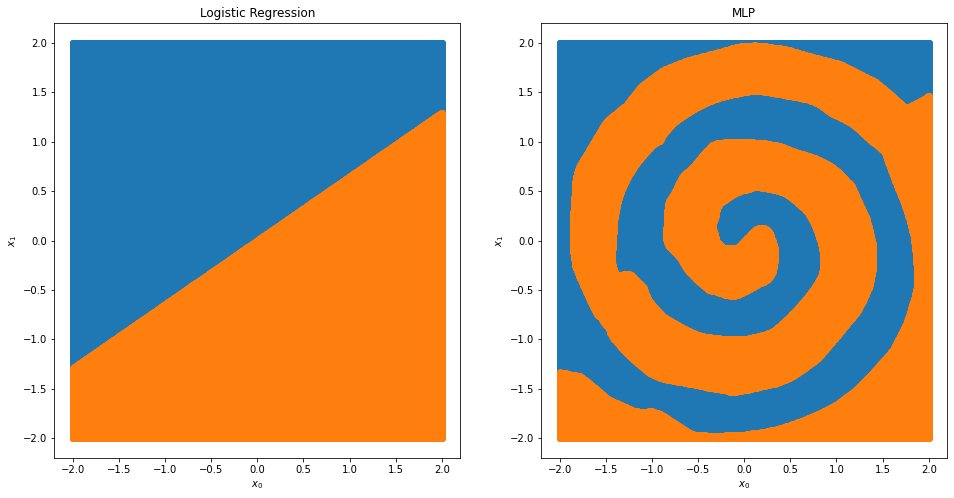

In [1]:
from __future__ import print_function

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle

from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils import to_categorical


# For reproducibility
np.random.seed(1000)

nb_samples = 2000


if __name__ == '__main__':
    # Create the dataset
    X = np.zeros(shape=(nb_samples, 2), dtype=np.float32)
    Y = np.zeros(shape=(nb_samples,), dtype=np.float32)

    t = 15.0 * np.random.uniform(0.0, 1.0, size=(int(nb_samples / 2), 1))

    X[0:int(nb_samples / 2), :] = t * np.hstack([-np.cos(t), np.sin(t)]) + \
                                  np.random.uniform(0.0, 1.8, size=(int(nb_samples / 2), 2))
    Y[0:int(nb_samples / 2)] = 0

    X[int(nb_samples / 2):, :] = t * np.hstack([np.cos(t), -np.sin(t)]) + \
                                 np.random.uniform(0.0, 1.8, size=(int(nb_samples / 2), 2))
    Y[int(nb_samples / 2):] = 1

    ss = StandardScaler()
    X = ss.fit_transform(X)

    X, Y = shuffle(X, Y, random_state=1000)

    # Show the dataset
    fig, ax = plt.subplots(figsize=(8, 8))

    ax.scatter(X[Y == 0, 0], X[Y == 0, 1], label='Class 0')
    ax.scatter(X[Y == 1, 0], X[Y == 1, 1], label='Class 1')
    ax.set_xlabel(r'$x_0$')
    ax.set_ylabel(r'$x_1$')
    ax.legend()
    ax.grid()

    plt.show()

    # Perform a Logistic Regression cross-validation
    lr = LogisticRegression(penalty='l2', C=0.01, random_state=1000)
    print(np.mean(cross_val_score(lr, X, Y, cv=10)))

    # Show the classification result
    lr.fit(X, Y)
    Y_pred_lr = lr.predict(X)

    fig, ax = plt.subplots(figsize=(8, 8))

    ax.scatter(X[Y_pred_lr == 0, 0], X[Y_pred_lr == 0, 1], label='Class 0')
    ax.scatter(X[Y_pred_lr == 1, 0], X[Y_pred_lr == 1, 1], label='Class 1')
    ax.set_xlabel(r'$x_0$')
    ax.set_ylabel(r'$x_1$')
    ax.legend()
    ax.grid()

    plt.show()

    # Create a Keras model
    model = Sequential()

    model.add(Dense(64, input_dim=2))
    model.add(Activation('relu'))

    model.add(Dense(32))
    model.add(Activation('relu'))

    model.add(Dense(16))
    model.add(Activation('relu'))

    model.add(Dense(2))
    model.add(Activation('softmax'))

    # Compile the model
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # Split the dataset into train and test sets
    X_train, X_test, Y_train, Y_test = \
        train_test_split(X, to_categorical(Y), test_size=0.2, random_state=1000)

    # Train the model
    model.fit(X_train, Y_train,
              epochs=100,
              batch_size=32,
              validation_data=(X_test, Y_test))

    # Show the classification result
    Y_pred_mlp = np.argmax(model.predict(X), axis=1)

    fig, ax = plt.subplots(figsize=(8, 8))

    ax.scatter(X[Y_pred_mlp == 0, 0], X[Y_pred_mlp == 0, 1], label='Class 0')
    ax.scatter(X[Y_pred_mlp == 1, 0], X[Y_pred_mlp == 1, 1], label='Class 1')
    ax.set_xlabel(r'$x_0$')
    ax.set_ylabel(r'$x_1$')
    ax.legend()
    ax.grid()

    plt.show()

    # Show the decision surfaces
    Xm = np.linspace(-2.0, 2.0, 1000)
    Ym = np.linspace(-2.0, 2.0, 1000)
    Xmg, Ymg = np.meshgrid(Xm, Ym)
    X_eval = np.vstack([Xmg.ravel(), Ymg.ravel()]).T

    Y_eval_lr = lr.predict(X_eval)
    Y_eval_mlp = np.argmax(model.predict(X_eval), axis=1)

    fig, ax = plt.subplots(1, 2, figsize=(16, 8))

    ax[0].scatter(X_eval[Y_eval_lr == 0, 0], X_eval[Y_eval_lr == 0, 1])
    ax[0].scatter(X_eval[Y_eval_lr == 1, 0], X_eval[Y_eval_lr == 1, 1])
    ax[0].set_xlabel(r'$x_0$')
    ax[0].set_ylabel(r'$x_1$')
    ax[0].set_title('Logistic Regression')

    ax[1].scatter(X_eval[Y_eval_mlp == 0, 0], X_eval[Y_eval_mlp == 0, 1])
    ax[1].scatter(X_eval[Y_eval_mlp == 1, 0], X_eval[Y_eval_mlp == 1, 1])
    ax[1].set_xlabel(r'$x_0$')
    ax[1].set_ylabel(r'$x_1$')
    ax[1].set_title('MLP')

    plt.show()